<a href="https://colab.research.google.com/github/sakethlingerker/Neural-netwoks-on-MNIST/blob/main/cnn_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


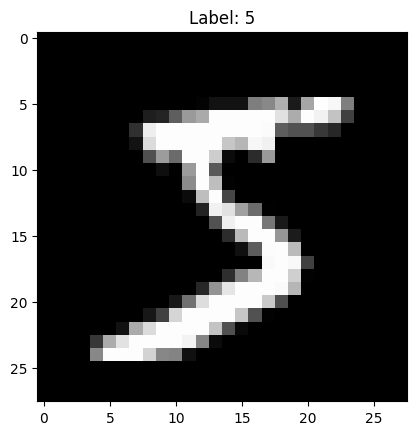

In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:

X_train = X_train.reshape(-1, 28, 28, 1)

X_test = X_test.reshape(-1, 28, 28, 1)
X_train=X_train/255
X_test=X_test/255

In [ ]:
print("Training data shape:", X_train.shape)

print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_train = y_train.reshape(-1, 10)  # Flatten the extra dimensions
y_test = y_test.reshape(-1, 10)  # Flatten the extra dimensions

print("Reshaped training labels shape:", y_train.shape)
print("Reshaped testing labels shape:", y_test.shape)


Reshaped training labels shape: (60000, 10)
Reshaped testing labels shape: (10000, 10)


In [ ]:
print("Training data shape:", X_train.shape)  # Should be (60000, 28, 28, 1)
print("Training labels shape:", y_train.shape)  # Should be (60000, 10)

print("Testing data shape:", X_test.shape)  # Should be (10000, 28, 28, 1)
print("Testing labels shape:", y_test.shape)  # Should be (10000, 10)


Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing data shape: (10000, 28, 28, 1)
Testing labels shape: (10000, 10)


In [ ]:
print(X_test[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
data=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2)

Epoch 1/10
1875/1875 - 61s - 32ms/step - accuracy: 0.9544 - loss: 0.1473 - val_accuracy: 0.9844 - val_loss: 0.0463
Epoch 2/10
1875/1875 - 56s - 30ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9877 - val_loss: 0.0381
Epoch 3/10
1875/1875 - 81s - 43ms/step - accuracy: 0.9894 - loss: 0.0341 - val_accuracy: 0.9893 - val_loss: 0.0314
Epoch 4/10
1875/1875 - 83s - 44ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9911 - val_loss: 0.0283
Epoch 5/10
1875/1875 - 80s - 43ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 6/10
1875/1875 - 82s - 44ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 7/10
1875/1875 - 54s - 29ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9911 - val_loss: 0.0286
Epoch 8/10
1875/1875 - 56s - 30ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9907 - val_loss: 0.0370
Epoch 9/10
1875/1875 - 79s - 42ms/step - accuracy: 0.9965 - loss: 0.0109 - val_a

In [ ]:
import numpy as np
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


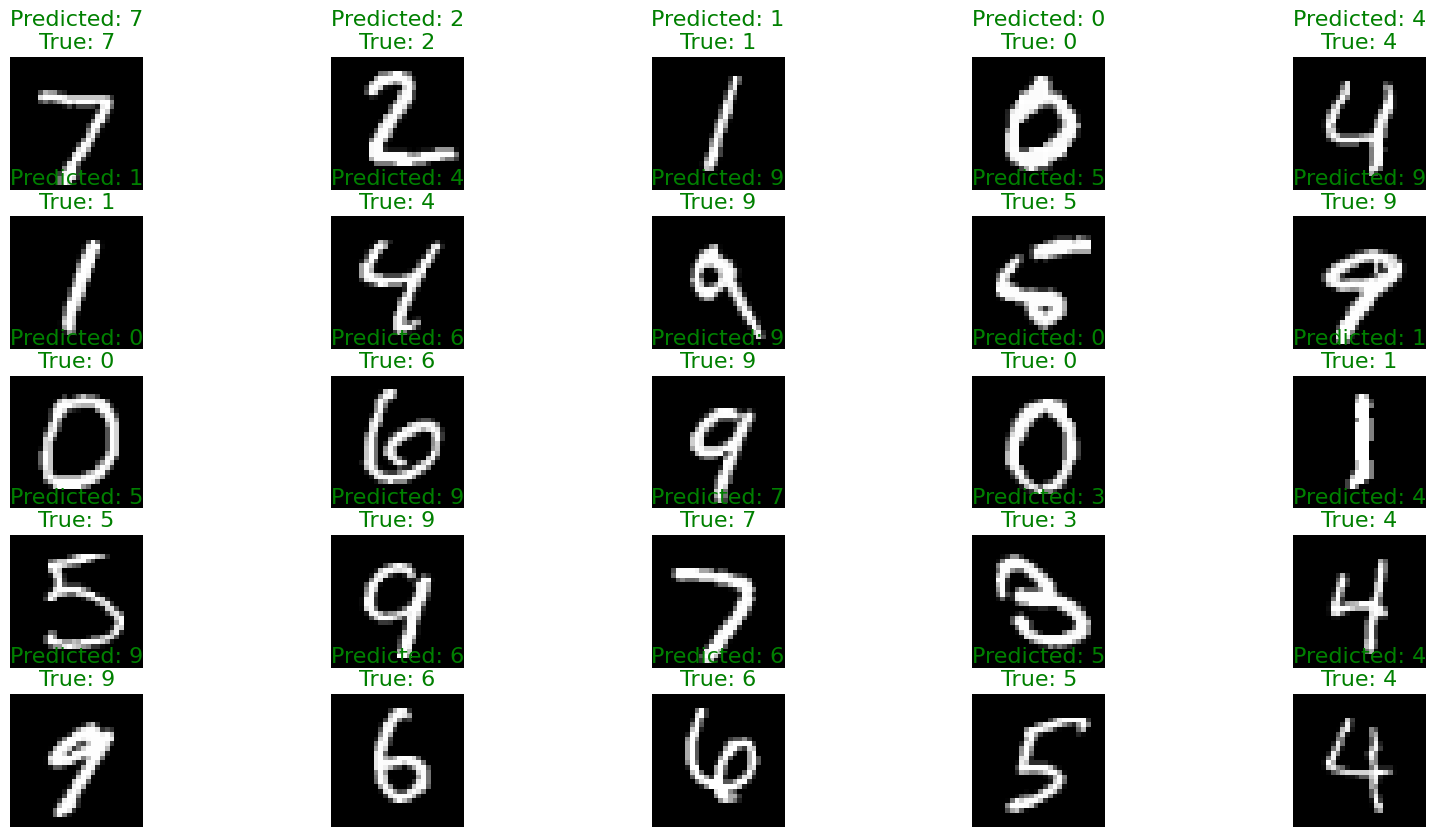

In [ ]:
# Plot some test images with their predictions
fig = plt.figure(figsize=(20, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(X_test[i].reshape(28, 28),cmap="gray")
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])


    ax.set_title(f"Predicted: {predicted_label}\nTrue: {true_label}",
                 color="green" if predicted_label == true_label else "red",
                 fontsize=16)
    ax.axis('off')

plt.show()

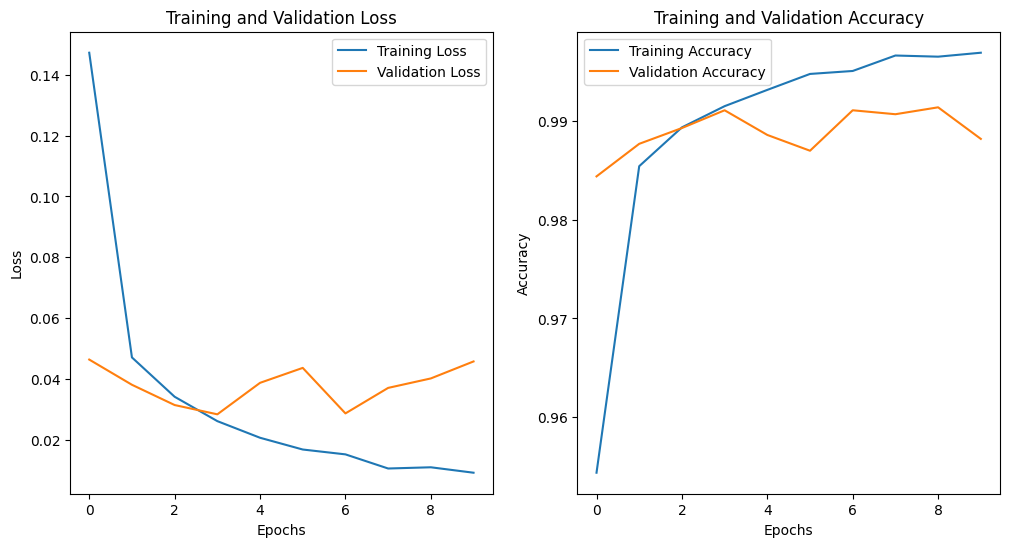

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(data.history['loss'], label='Training Loss')
plt.plot(data.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(data.history['accuracy'], label='Training Accuracy')
plt.plot(data.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"New training set shape: {X_train_new.shape}")
print(f"Validation set shape: {X_val.shape}")

New training set shape: (45000, 28, 28, 1)
Validation set shape: (15000, 28, 28, 1)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

data2 = model.fit(X_train_new, y_train_new, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9969 - val_loss: 0.0099
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9957 - val_loss: 0.0108
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9980 - loss: 0.0052 - val_accuracy: 0.9936 - val_loss: 0.0221
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9972 - val_loss: 0.0101
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9889 - val_loss: 0.0402
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.9976 - loss: 0.0057 - val_accuracy: 0.9953 - val_loss: 0.0154


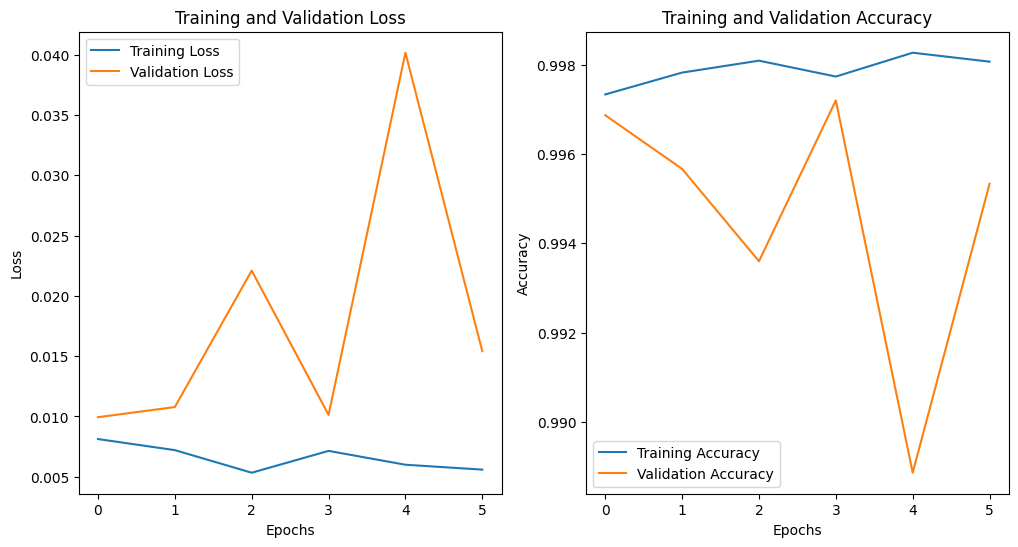

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(data2.history['loss'], label='Training Loss')
plt.plot(data2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data2.history['accuracy'], label='Training Accuracy')
plt.plot(data2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.043896134942770004
Test Accuracy: 0.9919000267982483


In [ ]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
new_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
new_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
data2 = new_model.fit(X_train_new, y_train_new, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.8039 - loss: 0.7645 - val_accuracy: 0.9671 - val_loss: 0.1703
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9568 - loss: 0.2080 - val_accuracy: 0.9797 - val_loss: 0.1098
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9710 - loss: 0.1449 - val_accuracy: 0.9801 - val_loss: 0.1014
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9741 - loss: 0.1255 - val_accuracy: 0.9837 - val_loss: 0.0867
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9767 - loss: 0.1079 - val_accuracy: 0.9863 - val_loss: 0.0754


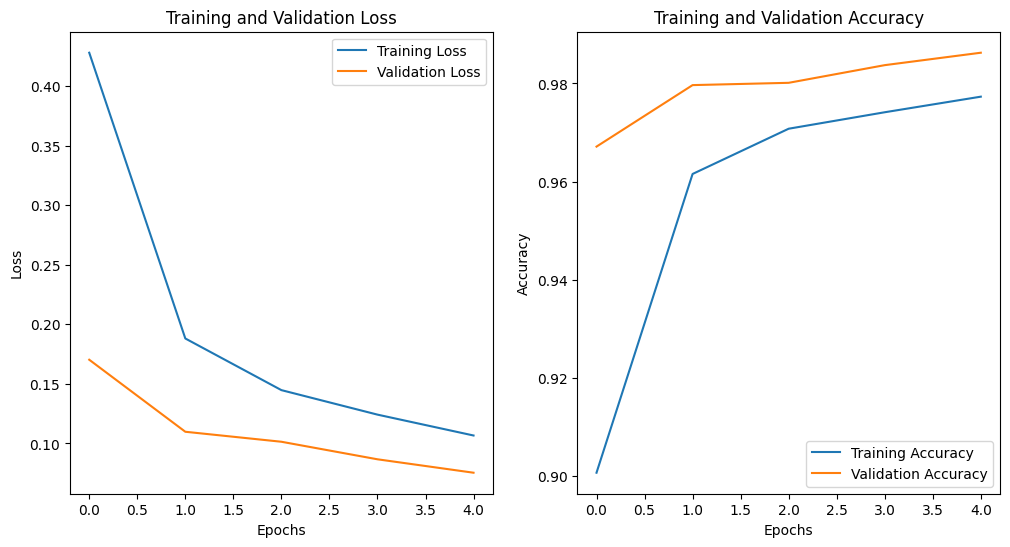

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(data2.history['loss'], label='Training Loss')
plt.plot(data2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data2.history['accuracy'], label='Training Accuracy')
plt.plot(data2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.043896134942770004
Test Accuracy: 0.9919000267982483


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracy_per_fold = []
loss_per_fold = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    print(f"Training on fold {fold_no}...")

    # Split data
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


    # Train the model
    history = model.fit(X_train_fold, y_train_fold,
                        validation_data=(X_val_fold, y_val_fold),
                        epochs=10, batch_size=32, verbose=2)

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {val_loss}, Accuracy: {val_accuracy}")

    accuracy_per_fold.append(val_accuracy)
    loss_per_fold.append(val_loss)
    fold_no += 1

# Report the final results
print("\nAverage validation accuracy:", np.mean(accuracy_per_fold))
print("Average validation loss:", np.mean(loss_per_fold))


Training on fold 1...
Epoch 1/10
1500/1500 - 53s - 35ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9982 - val_loss: 0.0070
Epoch 2/10
1500/1500 - 75s - 50ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9933 - val_loss: 0.0246
Epoch 3/10
1500/1500 - 83s - 55ms/step - accuracy: 0.9977 - loss: 0.0066 - val_accuracy: 0.9964 - val_loss: 0.0110
Epoch 4/10
1500/1500 - 80s - 54ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9969 - val_loss: 0.0104
Epoch 5/10
1500/1500 - 83s - 56ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9949 - val_loss: 0.0187
Epoch 6/10
1500/1500 - 45s - 30ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9963 - val_loss: 0.0122
Epoch 7/10
1500/1500 - 84s - 56ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9952 - val_loss: 0.0166
Epoch 8/10
1500/1500 - 82s - 55ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9955 - val_loss: 0.0158
Epoch 9/10
1500/1500 - 82s - 54ms/step - accuracy: 0.9985 

Epoch 1/10
1407/1407 - 47s - 34ms/step - accuracy: 0.9258 - loss: 0.5492 - val_accuracy: 0.9526 - val_loss: 0.3603
Epoch 2/10
1407/1407 - 43s - 30ms/step - accuracy: 0.9558 - loss: 0.3340 - val_accuracy: 0.9560 - val_loss: 0.3210
Epoch 3/10
1407/1407 - 81s - 58ms/step - accuracy: 0.9602 - loss: 0.3005 - val_accuracy: 0.9630 - val_loss: 0.2860
Epoch 4/10
1407/1407 - 82s - 58ms/step - accuracy: 0.9618 - loss: 0.2828 - val_accuracy: 0.9559 - val_loss: 0.2911
Epoch 5/10
1407/1407 - 83s - 59ms/step - accuracy: 0.9635 - loss: 0.2665 - val_accuracy: 0.9665 - val_loss: 0.2575
Epoch 6/10
1407/1407 - 42s - 30ms/step - accuracy: 0.9646 - loss: 0.2568 - val_accuracy: 0.9680 - val_loss: 0.2444
Epoch 7/10
1407/1407 - 42s - 30ms/step - accuracy: 0.9651 - loss: 0.2491 - val_accuracy: 0.9655 - val_loss: 0.2418
Epoch 8/10
1407/1407 - 43s - 31ms/step - accuracy: 0.9656 - loss: 0.2430 - val_accuracy: 0.9681 - val_loss: 0.2414
Epoch 9/10
1407/1407 - 81s - 57ms/step - accuracy: 0.9674 - loss: 0.2366 - val_a

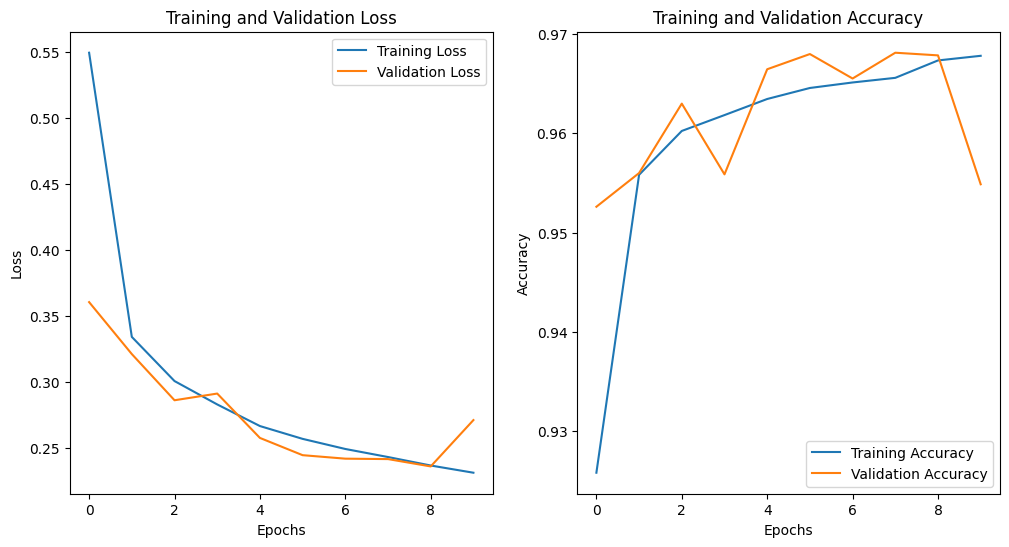

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model with L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.25151148438453674
Test Accuracy: 0.9589999914169312
